In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bagsolver.bag import Bag
from bagsolver.utils import load_bag_data, parse_solution
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor, as_completed

from experiment2 import run

- Experiment má odpovědět na tyto otázky:
- Odpovídají obě závislosti (kvality a času) předpokladům?
- Je některá heuristická metoda systematicky lepší (tzv. dominance) v některém kritériu?
- Jak se liší obtížnost jednotlivých sad z hlediska jednotlivých metod?
- Jaká je závislost maximální chyby (ε) a času FPTAS algoritmu na zvolené přesnosti? Odpovídá předpokladům?

In [27]:
runs = {
    "branch_bound": ("solve_branch_bound", {}),
    "greedy_simple": ("solve_greedy", {"redux": False}),
    "greedy_redux": ("solve_greedy", {"redux": True}),
    "dynamic_cost": ("solve_dynamic_cost", {}),
    "dynamic_weight": ("solve_dynamic_weight", {}),
    "solve_ftapas_03": ("solve_ftapas", {"epsilon": 0.3}),
    "solve_ftapas_05": ("solve_ftapas", {"epsilon": 0.5}),
    "solve_ftapas_07": ("solve_ftapas", {"epsilon": 0.7}),
}

df = run(runs, 5, ThreadPoolExecutor, 3)

In [32]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("full-to-27.csv")

In [58]:
ftapas = ["solve_ftapas_15", "solve_ftapas_30", "solve_ftapas_50", "solve_ftapas_70"]
df["ftapas"] = df.key.isin(ftapas)
df["heuristic"] = df.key.isin(["greedy_simple", "greedy_redux"]+ftapas)

In [71]:
data = df[df.ftapas & (df["size"] == 25)]

In [140]:
results = []

for dataset in data.dataset.unique():
    for key in data.key.unique():
        sel = data[(data.dataset == dataset) & (data.key == key)]
        results.append(
            (dataset, key, sel.elapsed.mean(), sel.elapsed.var(), sel.delta.mean(), sel.delta.var())
        )
        
viz = pd.DataFrame(results, columns = ["dataset", "key", "mean_elapsed", "var_elapsed", "mean_delta", "var_delta"])

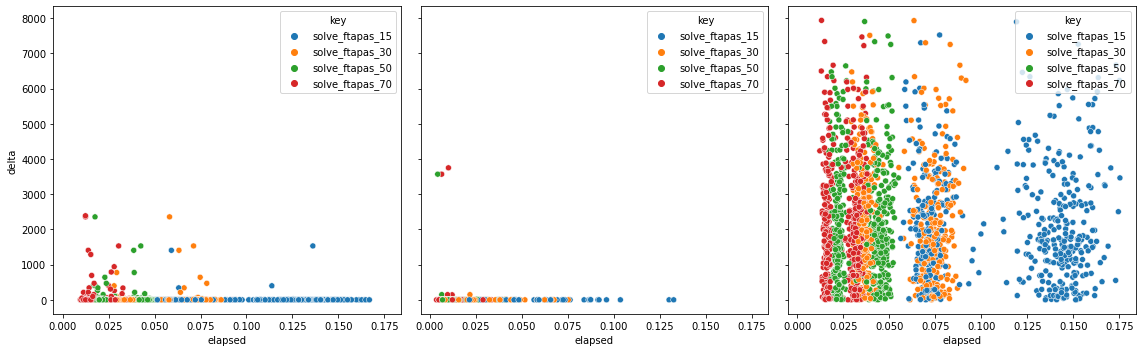

In [296]:
data = df[df.ftapas & (df["size"] == 25)].copy()
fig, ax = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(16, 5))
for i, dataset in enumerate(['NK', 'ZKW', 'ZKC']):
    subdata = data[data.dataset == dataset]
    sns.scatterplot(x="elapsed", y="delta", hue="key", data=subdata, ax=ax[i], hue_order=ftapas)
plt.tight_layout()
plt.show()

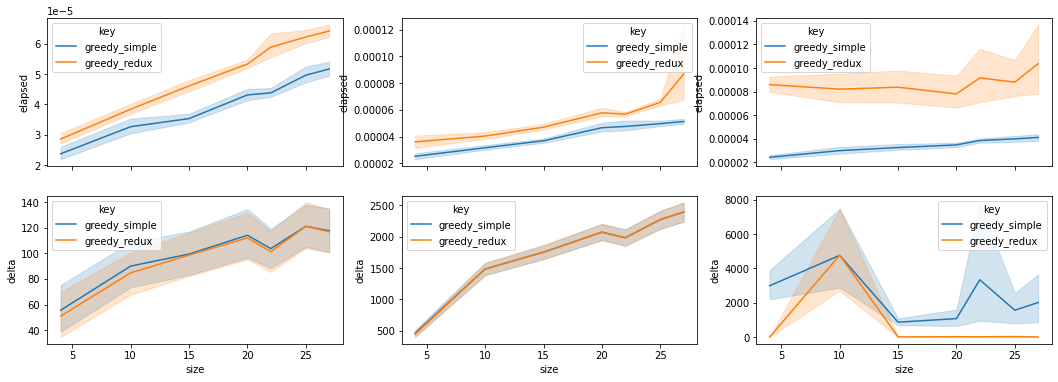

In [297]:
v = df[df.key.isin(["greedy_simple", "greedy_redux"])].copy()
fig, ax = plt.subplots(figsize=(18, 6), nrows=2, ncols=3, sharex=True)
for c, dataset in enumerate(['NK', 'ZKC', 'ZKW']):
    select = v[v.dataset == dataset]
    sns.lineplot(data=select, x="size", y="elapsed", hue="key", ax=ax[0, c])
    sns.lineplot(data=select, x="size", y="delta", hue="key", ax=ax[1, c])
plt.show()

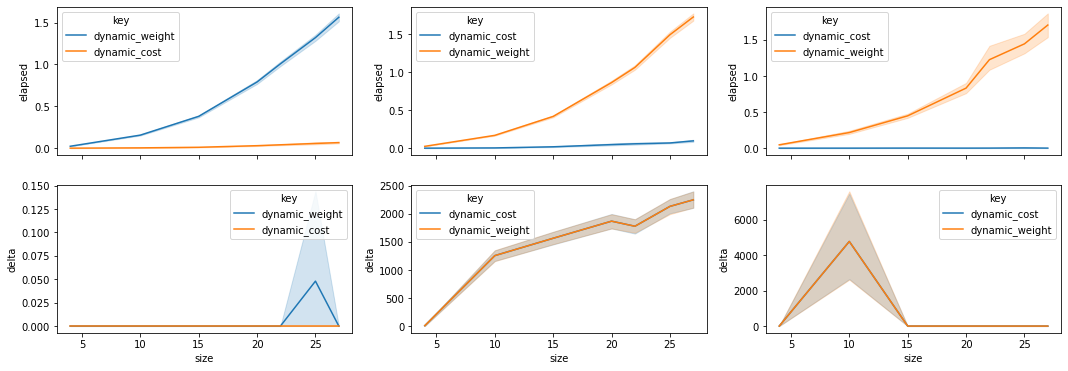

In [300]:
v = df[df.key.isin(["dynamic_weight", "dynamic_cost"])].copy()
fig, ax = plt.subplots(figsize=(18, 6), nrows=2, ncols=3, sharex=True)
for c, dataset in enumerate(['NK', 'ZKC', 'ZKW']):
    select = v[v.dataset == dataset]
    sns.lineplot(data=select, x="size", y="elapsed", hue="key", ax=ax[0, c])
    sns.lineplot(data=select, x="size", y="delta", hue="key", ax=ax[1, c])
plt.show()

fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(x="elapsed", y="delta", style="dataset", hue="key", data=data, ax=ax, hue_order=ftapas)
ax.set_yscale("log")
ax.set_ybound(lower=1)
plt.tight_layout(pad=0.1)

#plt.savefig('report/size_vs_ops_lineplot.png')